In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
class bandit:
    
    def __init__(self,prob):
        self.prob = prob
        self.qValue = 10
        self.count = 1
        
    def pull(self):
        return np.random.random()<self.prob
    
    
    def update(self,reward):
        self.count = self.count + 1
        self.qValue = self.qValue + ( (reward - self.qValue)/self.count)

           

In [31]:
############## E-GREEDY ALGORITHM ################
def Greedy(qValues):
    arm = np.argmax(qValues)    
    return arm


Q values:  [0.7222222222222222, 0.7391304347826088, 0.7548043062682369]
Best arm out of 3 arm is:  3
num of times selected optimal bandit:  9938
total reward is:  7519.0
Win rate:  0.7519


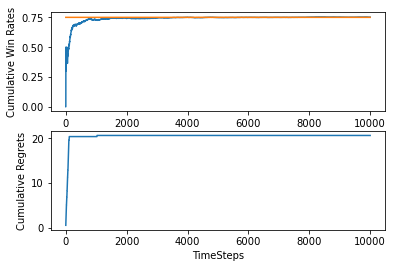

In [32]:
############ TEST CASE#################
NUM_TRIALS = 10000
banditsProbs = [0.2, 0.5, 0.75]
rewards = np.zeros(NUM_TRIALS)
regrets = np.zeros(NUM_TRIALS)


bandits = [bandit(x) for x in banditsProbs]
optimalArm = np.argmax([b.prob for b in bandits])
numOfOptimal = 0
i=0
while i < NUM_TRIALS :

    arm = Greedy([b.qValue for b in bandits])
    curReward = bandits[arm].pull()
    bandits[arm].update(curReward)
    rewards[i] = curReward
    regrets[i] = banditsProbs[optimalArm] - banditsProbs[arm]
    if arm == optimalArm:
        numOfOptimal +=1
    i=i+1
    
    
    

print("Q values: " ,[b.qValue for b in bandits])
print("Best arm out of",len(bandits) ,"arm is: ", np.argmax([b.qValue for b in bandits])+1 )
print("num of times selected optimal bandit: ",numOfOptimal)        
print("total reward is: ",rewards.sum())
print("Win rate: ",rewards.sum()/NUM_TRIALS)

cumulativeRewards = np.cumsum(rewards)
winRates = cumulativeRewards/(np.arange(NUM_TRIALS)+1)

plt.subplot(2,1,1)
plt.plot(winRates)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Win Rates")
plt.plot(np.ones(NUM_TRIALS)*np.max(banditsProbs))

regrets = np.cumsum(regrets) #cumulative rewards loss due to the need of learning
plt.subplot(2,1,2)
plt.plot(regrets)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Regrets")
plt.show()

In [33]:
#Note that The optimal q is converged and the other two arms are not converged because after the last one reaches 
#to the true mean the greedy algorithms won't choose the other two and don't update them

#Note that we use Greedy approach here because the exploration part is handled by the optimistic inital values